t_i =  [2.47037037e-32 6.20528981e-34 1.55869833e-35 3.91527318e-37
 9.83472158e-39 2.47037037e-40] s


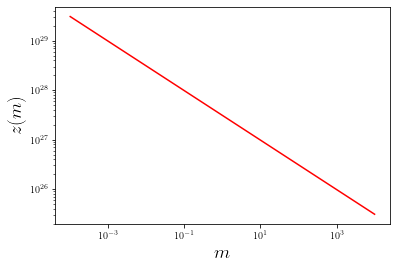

In [1]:
from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy import integrate
from accretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

bin_centres = np.geomspace(1e4, 1e-4, 6)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m_1 = np.geomspace(1e4, 1e-4, 6)
m_2 = np.geomspace(1e4, 1e-4, 6)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist() 

η_acc = 0.1      # Radiation Efficiency with standard value = 0.1.


plt.loglog(m_1 , z_pbh(m_1), 'r')
plt.xlabel('$m$', fontsize = 19) 
plt.ylabel('$z(m)$', fontsize = 19)
plt.show()

t_i =  0.04913566666666666 s
m_i = 10000.0000 M☉ , z_i = 2.1924e+10
t_i =  0.0012342321440317753 s
m_i = 251.1886 M☉ , z_i = 1.3833e+11
t_i =  3.100250975926394e-05 s
m_i = 6.3096 M☉ , z_i = 8.7281e+11
t_i =  7.787478360703832e-07 s
m_i = 0.1585 M☉ , z_i = 5.5070e+12
t_i =  1.956126122992644e-08 s
m_i = 0.0040 M☉ , z_i = 3.4747e+13
t_i =  4.913566666666667e-10 s
m_i = 0.0001 M☉ , z_i = 2.1924e+14


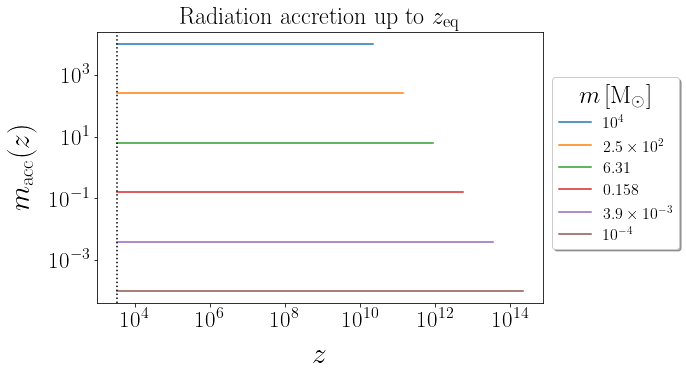

In [2]:
#Accretion of radiation around the PBH in radiation domination 
# as per ρ = ρ_r0 (1 + z)⁴ up to z_eq.
# v<< c_s


def m_racc(m, z):
    c_s  = c/np.sqrt(3)
    α  = ((4 * π * (G**2))/(c_s**3)) * ((3/(8 * π * ρ_c0 * G))**(1/2))
    y = (1 + z)
    y_i = (1 + z_i)
    upper_limit = (y/Ω_r0) - ((Ω_m0 * np.log(Ω_m0 + Ω_r0 * y))/(Ω_r0**2))
    lower_limit = (y_i/Ω_r0) - ((Ω_m0 * np.log(Ω_m0 + Ω_r0 * y_i))/(Ω_r0**2))
    first_term  = α *  ρ_r0  * (upper_limit - lower_limit) * η_acc
    second_term = 1/m
    return (1/(first_term + second_term))


fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    z_i = z_pbh(m)
    print("m_i =", '%0.4f'%(m/M_solar), "M☉", "," , "z_i =", '%0.4e'%z_i)
    z = np.geomspace(z_i, z_eq, 10)
    z_list = z.tolist()
    m_change_list = np.zeros(len(z_list))
    for j, z in enumerate(z_list): 
        m_change_list[j] = (m_racc(m, z))
    ax.loglog(z_list, m_change_list/M_solar, color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$m_\mathrm{acc}(z) $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.title('Radiation accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()